## Covid-19 no Nordeste Brasileiro: análise da Campanha de Vacinação e monitoramento dos casos de Síndrome Respiratória Aguda Grave  

**Professor:** Yuri Malheiros  
**Alunos:** João Victor Alcoforado de Araújo  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Lívia Noêmia Morais Rocha   
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Matheus Rocha dos Santos Rangel  

---

## **1 Introdução**

O final do ano de 2019 foi marcado pela aparição de um novo coronavírus em Wuhan, China. Por conta da sua rápida disseminação, o surto da síndrome respiratória aguda grave coronavírus 2 (SARS-CoV-2), rapidamente foi declarado como uma pandemia global. 

O primeiro caso notificado no Brasil foi registrado em 26 de fevereiro, e depois disso o número de casos cresceu rapidamente. Felizmente, através de um árduo trabalho cooperativo da comunidade científica, vacinas foram desenvolvidas e aprovadas para uso completo. No entanto, no Brasil, o fornecimento e distribuição dessas vacinas ainda encontram entraves para atender às necessidades atuais. Considerando a magnitude do problema, ressalta-se a importância de produção de informações e análises que demonstrem as características e perfis epidemiológicos da doença no contexto brasileiro, a fim de auxiliar processos de tomada de decisão.

Dessa forma, este estudo tem como objetivo monitorar a evolução dos casos de Síndrome Respiratória Aguda Grave (SRAG), bem como analisar a campanha de vacinação contra Covid-19 no nordeste do Brasil. Para tanto, foram compilados e analisados os dados epidemiológicos da SRAG e campanha de vacinação disponibilizados pelo OpenDatasus (https://opendatasus.saude.gov.br/).


## **2 Dados utilizados**

Como dito anteriormente, este é um estudo epidemiológico descritivo, realizado através da utilização de dados extraídos do OpenDatasus, acessíveis online e gratuitamente. O OpenDatasus disponibiliza informações que podem servir para subsidiar análises objetivas da situação sanitária, tomadas de decisão baseadas em evidências e elaboração de programas de ações de saúde. Para realizar as nossas análises, predições e visualizações de dados, utilizamos os conjuntos de dados SRAG 2021 - Banco de Dados de Síndrome Respiratória Aguda Grave e Campanha Nacional de Vacinação Contra Covid-19 (CNVCC).

### **2.1 SRAG 2021 - Banco de Dados de Síndrome Respiratória Aguda Grave**

O banco de dados epidemiológico de SRAG contém informações das fichas de notificação de registro individual para casos de SRAG, incluindo os casos de Covid-19. O dicionário de dados do conjunto de dados pode ser acessado através do seguinte link: Modelo de Casos de Uso (saude.gov.br). O conjunto de dados disponibilizado passa por tratamento que envolve a anonimização, em cumprimento a legislação. Além disso, os dados de 2021 são disponibilizados semanalmente, às quartas-feiras, podendo, excepcionalmente, haver atualização em outro dia. 

### **2.2 Campanha Nacional de Vacinação contra Covid-19**

O conjunto de dados da Campanha Nacional de Vacinação contra Covid-19 contém os registros de vacinação contra Covid-19 contidos na Rede Nacional de Dados em Saúde (RNDS), desde o início da campanha. O dicionário de dados do conjunto de dados pode ser acessado através do seguinte link: Campanha de Vacinação (saude.gov.br). Os dados disponíveis englobam o número de doses aplicadas, por UF e municípios, por um determinado período, por gênero, por faixa etária e por tipo de vacina. 

## **3 Exploração Inicial dos Dados**

Inicialmente, os conjuntos de dados foram analisados com diferentes métodos de exploração e visualização de dados a fim de fornecer informações ainda mais claras sobre a evolução dos casos de SRAG e o andamento da campanha de vacinação contra Covid-19 no nordeste do Brasil. Ambas as análises foram guiadas por perguntas definidas previamente pelo grupo de trabalho e serão apresentadas a seguir.


#### **Dependências e Configurações Gerais**

In [ ]:
#Dependencias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics     
from collections import Counter
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

In [ ]:
#Configurações da visualização do DataFrame
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)

### **3.1 Exploração Inicial - CNVCC**

#### **Pré-exploração**

Antes da exploração inicial, como o dataset é muito grande e demora a ser precessado analisou-se a partir do dicionário de dados quais seriam as features que seriam úteis para a análise pretendida. Posteriormente, os datasets respectivos a campanha nacional de vacinação de cada estado do nordeste brasileiro foram reunidos em um único dataset como segue abaixo.

In [ ]:
#Acesso local
caminho = 'Datasets/CNVCC/'
arquivos = os.listdir(caminho)

Abaixo seguem as features selecionadas para compor a análise. 

In [ ]:
#Features selecionadas para compor a analise
colunas = ['paciente_id', 'paciente_idade', 'paciente_enumSexoBiologico', 
           'estabelecimento_uf', 'vacina_categoria_nome', 'vacina_dataAplicacao', 
           'vacina_descricao_dose', 'vacina_nome']

In [ ]:
#Reune os datasets dos estados em um único dataset
nordeste_cnvcc = pd.read_csv(caminho+arquivos.pop(), usecols=colunas, sep=';')[colunas]

for arquivo in arquivos:
    estado = pd.read_csv(caminho+arquivo, usecols=colunas, sep=';')[colunas]
    nordeste_cnvcc = nordeste_cnvcc.append(estado, ignore_index=True)

Posteriormente, verificou-se que o dataset continha instâncias duplicadas, provavelmente devido a alguma incosistência no banco de dados. Como consequência, instâncias duplicadas foram removidas.

In [ ]:
#Remove as instancias duplicadas
nordeste_cnvcc = nordeste.drop_duplicates()

Por fim, o dataset foi exportado para uso posterior. 

In [ ]:
#Exporta Dataset
nordeste_cnvcc.to_csv('Datasets/CNVCC/CNVCC - Nordeste.csv', index=False)

#### **Inicio da exploração**

In [ ]:
cnvcc = pd.read_csv('Datasets/CNVCC - Nordeste.csv')

In [ ]:
cnvcc.head()

,paciente_id,paciente_idade,paciente_enumSexoBiologico,estabelecimento_uf,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome
0,6b16f0c5e10a74e22ad7f043d723f475cf6b1f349db2d159965d2b76eee68964,23.0,F,MA,Trabalhadores de Saúde,2021-04-30T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield
1,d7390505c9f33725adf5af0de73e5924bdd4db1154b3ad9960902207e71dacee,73.0,F,MA,Faixa Etária,2021-03-11T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan
2,3aec5e352cba8ad396136966088797ec45e9b29aebd136bb744164da0bffa571,61.0,F,MA,Faixa Etária,2021-04-29T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield
3,fafb9a784ebdf54d418b37c1b0e0260cf371c16ead72c6cbafff9fd8c196a00e,23.0,F,MA,Povos Indígenas,2021-03-12T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan
4,1b518f76d0415ffdb07e65f875db7f6a8a6ec741748375818a635a4182463620,70.0,F,MA,Faixa Etária,2021-04-29T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan


#### **Análise de valores nulos**

Verificou-se que o dataset tem poucos dados ausentes. Entretanto, a feature `vacina_categoria_nome` marece atenção.

In [ ]:
cnvcc.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11503873 entries, 0 to 11503872
Data columns (total 8 columns):
 #   Column                      Non-Null Count     Dtype  
---  ------                      --------------     -----  
 0   paciente_id                 11503872 non-null  object 
 1   paciente_idade              11503872 non-null  float64
 2   paciente_enumSexoBiologico  11503872 non-null  object 
 3   estabelecimento_uf          11503873 non-null  object 
 4   vacina_categoria_nome       11445764 non-null  object 
 5   vacina_dataAplicacao        11503873 non-null  object 
 6   vacina_descricao_dose       11503873 non-null  object 
 7   vacina_nome                 11503873 non-null  object 
dtypes: float64(1), object(7)
memory usage: 702.1+ MB


#### **Centralidade, dispersão e boxplot da Idade**

Verifica-se uma grande variabilidade na idade dos grupos vacinados. No dataset consta muitos pacientes com mais de 120 anos. Além disso, verifica-se a existência de outiliers, pacientes com mais de 130 anos. 

In [ ]:
cnvcc['paciente_idade'].describe()

count    1.150387e+07
mean     6.441079e+01
std      1.692392e+01
min      0.000000e+00
25%      6.000000e+01
50%      6.800000e+01
75%      7.500000e+01
max      2.210000e+02
Name: paciente_idade, dtype: float64

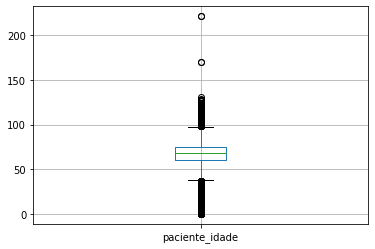

In [ ]:
cnvcc.boxplot('paciente_idade')

#### **Frequência de pessoas por quantidade de doses**

Cada paciente possui um id único no dataset. A partir desta exploração verificou-se a existência de pacientes que tomaram mais que duas doses da vacina. Esse resultado pode demonstrar algumas fragilidades no sistema de vacinação, uma vez que permitiu-se o cadastro do mesmo paciente varias vezes no sistema. Por fim, vale ressaltar como evidência desse fato, o caso de um paciente que teoricamente tomou 59 vacinas. 

In [ ]:
cnvcc.groupby('paciente_id').size().value_counts(dropna=False)

1     4346394
2     3420694
3       82940
4       16564
5         179
6          10
59          1
dtype: int64

#### **Frequência de pessoas por sexo biológico**

In [ ]:
cnvcc['paciente_enumSexoBiologico'].value_counts(dropna=False)

F      6730116
M      4773746
I           10
NaN          1
Name: paciente_enumSexoBiologico, dtype: int64

#### **Frequência de pessoas por categoria de vacinação**

A exploração abaixo expõe o número de paciente vacinados por grupo prioritário até a data da obtenção do dataset. Vale ressaltar que esta é a feature com mais dados ausentes.

In [ ]:
cnvcc['vacina_categoria_nome'].value_counts(sort=True, ascending=False, dropna=False)

Faixa Etária                                       7926542
Trabalhadores de Saúde                             2608180
Povos e Comunidades Tradicionais                    246014
Pessoas de 60 anos ou mais institucionalizadas      184401
Povos Indígenas                                     166532
Comorbidades                                        142096
Trabalhadores da Educação                            89597
Forças de Segurança e Salvamento                     62946
NaN                                                  58109
Pessoas com Deficiência                              10142
Funcionário do Sistema de Privação de Liberdade       6064
Forças Armadas (membros ativos)                       2195
Pessoas em Situação de Rua                             435
Trabalhadores Portuários                               237
População Privada de Liberdade                         202
Trabalhadores Industriais                              181
Name: vacina_categoria_nome, dtype: int64

#### **Frequência de pessoas por fabricante de vacina**

In [ ]:
cnvcc['vacina_nome'].value_counts(sort=True, ascending=False, dropna=False)

Covid-19-Coronavac-Sinovac/Butantan                          8411103
Vacina Covid-19 - Covishield                                 2824612
Covid-19-AstraZeneca                                          265506
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer       2601
Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag                     51
Name: vacina_nome, dtype: int64

#### **Frequência de vacinados por estado**

In [ ]:
cnvcc['estabelecimento_uf'].value_counts(sort=True, ascending=False, dropna=False)

BA    3234512
PE    1930605
CE    1522101
MA    1341954
PB     993469
RN     764167
AL     679551
PI     643880
SE     393634
Name: estabelecimento_uf, dtype: int64

### **3.2 Exploração Inicial - SRAG**

#### **Pré-exploração**

Antes da exploração inicial, analisou-se a partir do dicionário de dados, quais seriam as features que seriam úteis para a análise pretendida. Posteriormente, são mantidos apenas os casos de notificação pertencentes aos estados do nordeste brasileiro. Ademais, para fins de simplficação da análise, os casos sem classificação final, ou seja, sem classificação da doença do paciente foram removidos.

In [ ]:
#Features selecionadas para compor a analise
colunas = ['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'CS_SEXO', 'NU_IDADE_N', 'TP_IDADE',
           'SG_UF', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 
           'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA',
           'FATOR_RISC', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 
           'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 
           'OBESIDADE', 'HOSPITAL', 'DT_INTERNA', 'UTI', 'DT_ENTUTI', 'DT_SAIDUTI',
           'SUPORT_VEN', 'CLASSI_FIN', 'EVOLUCAO', 'DT_EVOLUCA']

srag = pd.read_csv('Datasets/SRAG/SRAG - 2021.csv', usecols=colunas)[colunas]

In [ ]:
#Mantém apenas os casos de notificações pertencentes aos estados do nordeste
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
srag = srag[srag['SG_UF'].isin(nordeste)]

#Remove casos sem classificação final 
srag = srag.dropna(subset=['CLASSI_FIN'])

In [ ]:
#Exporta Dataset
srag.to_csv('Datasets/SRAG/SRAG - Nordeste.csv', index=False)

#### **Inicio da exploração**

In [ ]:
srag = pd.read_csv('Datasets/SRAG/SRAG - Nordeste.csv')

In [ ]:
srag.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,TP_IDADE,SG_UF,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA
0,06/01/2021,1,03/01/2021,F,80,3,PE,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,S,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,05/01/2021,2.0,NaN,NaN,2.0,5.0,2.0,13/01/2021
1,08/01/2021,1,04/01/2021,F,1,3,PB,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,08/01/2021,2.0,NaN,NaN,3.0,5.0,1.0,10/01/2021
2,11/01/2021,2,05/01/2021,F,68,3,BA,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,S,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,09/01/2021,1.0,09/01/2021,19/01/2021,3.0,4.0,1.0,25/01/2021
3,14/04/2021,15,12/04/2021,M,87,3,BA,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,05/04/2021,2.0,NaN,NaN,3.0,4.0,NaN,NaN
4,03/01/2021,1,03/01/2021,F,54,3,AL,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,03/01/2021,NaN,NaN,NaN,NaN,5.0,1.0,14/01/2021


#### **Análise de valores nulos do dataset**

Verifica-se que existem muito dados ausentes no dataset. Cada feature será tratada de acordo com seu caso específico para fins de análise.  

In [ ]:
srag.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95753 entries, 0 to 95752
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DT_NOTIFIC  95753 non-null  object 
 1   SEM_NOT     95753 non-null  int64  
 2   DT_SIN_PRI  95753 non-null  object 
 3   CS_SEXO     95753 non-null  object 
 4   NU_IDADE_N  95753 non-null  int64  
 5   TP_IDADE    95753 non-null  int64  
 6   SG_UF       95753 non-null  object 
 7   FEBRE       78031 non-null  float64
 8   TOSSE       81576 non-null  float64
 9   GARGANTA    59574 non-null  float64
 10  DISPNEIA    82321 non-null  float64
 11  DESC_RESP   73443 non-null  float64
 12  SATURACAO   75394 non-null  float64
 13  DIARREIA    58669 non-null  float64
 14  VOMITO      57289 non-null  float64
 15  DOR_ABD     55784 non-null  float64
 16  FADIGA      58060 non-null  float64
 17  PERD_OLFT   56935 non-null  float64
 18  PERD_PALA   56802 non-null  float64
 19  FATOR_RISC  95753 non-nul

#### **Centralidade, dispersão e boxplot da Idade**

A coluna `NU_IDADE_N`, referente a idade, está atrelada a coluna `TP_IDADE`, que informa se a idade constante refere-se a anos, meses ou dias de vida. Essa representação pode provocar problemas, portanto, precisará ser padronizada. 

In [ ]:
srag['NU_IDADE_N'].describe()

count    95753.000000
mean        56.656543
std         21.328315
min          0.000000
25%         43.000000
50%         59.000000
75%         72.000000
max        126.000000
Name: NU_IDADE_N, dtype: float64

O outlier, pode ser explicado pela representação em dias.

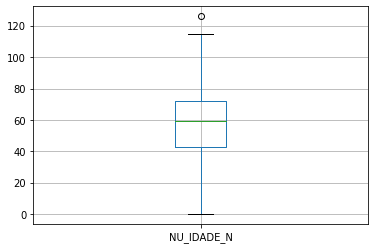

In [ ]:
srag.boxplot("NU_IDADE_N")

In [ ]:
srag[srag['NU_IDADE_N'] == 126]

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,TP_IDADE,SG_UF,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA
21662,14/03/2021,11,06/03/2021,F,126,3,PI,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,14/03/2021,2.0,NaN,NaN,3.0,5.0,1.0,15/03/2021


#### **Análise de validade dos anos das datas registradas**

Verificou-se muitas datas de notificação nulas ou escritas erradas. Esses casos serão tratados na etapa de pré-processamento. 

In [ ]:
colunas_datatime = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_ENTUTI', 'DT_SAIDUTI', 'DT_EVOLUCA']

for column in colunas_datatime:
    print(column, srag[column].str[6:10].unique())

DT_NOTIFIC ['2021']
DT_SIN_PRI ['2021']
DT_INTERNA ['2021' nan '2020' '3202' '2019']
DT_ENTUTI [nan '2021' '2020' '2202' '2022' '2024']
DT_SAIDUTI [nan '2021' '2020']
DT_EVOLUCA ['2021' nan]


#### **Analise preliminar dos tempo de internção e UTI**

In [ ]:
#Transformação de dados para análise dos tempos de internação e UTI
colunas_datatime = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_ENTUTI', 'DT_SAIDUTI', 'DT_EVOLUCA']

for coluna in colunas_datatime:
    srag[coluna] = pd.to_datetime(srag[coluna], errors="coerce", dayfirst=True)

In [ ]:
#Criacao das colunas tempo de internação e UTI
srag["TEMPO_INTER"] = ((srag["DT_EVOLUCA"] - srag["DT_INTERNA"]).dt.days).astype("Int64")
srag["TEMPO_UTI"] = ((srag["DT_SAIDUTI"] - srag["DT_ENTUTI"]).dt.days).astype("Int64")

In [ ]:
srag.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,TP_IDADE,SG_UF,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,TEMPO_INTER,TEMPO_UTI
0,2021-01-06,1,2021-01-03,F,80,3,PE,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,S,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2021-01-05,2.0,NaT,NaT,2.0,5.0,2.0,2021-01-13,8,<NA>
1,2021-01-08,1,2021-01-04,F,1,3,PB,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2021-01-08,2.0,NaT,NaT,3.0,5.0,1.0,2021-01-10,2,<NA>
2,2021-01-11,2,2021-01-05,F,68,3,BA,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,S,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2021-01-09,1.0,2021-01-09,2021-01-19,3.0,4.0,1.0,2021-01-25,16,10
3,2021-04-14,15,2021-04-12,M,87,3,BA,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2021-04-05,2.0,NaT,NaT,3.0,4.0,NaN,NaT,<NA>,<NA>
4,2021-01-03,1,2021-01-03,F,54,3,AL,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2021-01-03,NaN,NaT,NaT,NaN,5.0,1.0,2021-01-14,11,<NA>


#### **Analise de valores nulos do tempo de internação e UTI**

Os valores nulos apresentados abrangem dois casos: (i) a notificação consta que o paciente não precisou de internação ou (ii) o paciente continua internado. Esses casos ocorrem quando ambas as datas de entradas e saida são nulas, ou existe data de entradas, mas não data de saída. 

In [ ]:
srag[['TEMPO_INTER', 'TEMPO_UTI']].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95753 entries, 0 to 95752
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   TEMPO_INTER  60505 non-null  Int64
 1   TEMPO_UTI    13713 non-null  Int64
dtypes: Int64(2)
memory usage: 1.6 MB


#### **Centralidade, dispersão e boxplot do tempo de internação**

Verifica-se que o tempo de internação apresenta uma grande dispersão e presença de outliers. Apesar disso, 50% do dados mais centrais apresentam pouca dispersão e 75% permancem internados em um intervalo de 0 à 12 dias.

In [ ]:
srag["TEMPO_INTER"].describe()

count    60505.000000
mean         9.347723
std          9.228326
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        379.000000
Name: TEMPO_INTER, dtype: float64

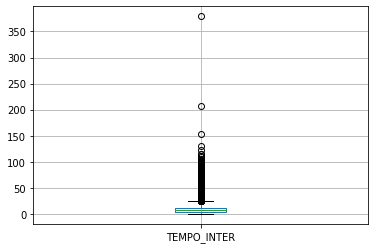

In [ ]:
srag.boxplot("TEMPO_INTER")

#### **Centralidade, dispersão e boxplot do tempo de UTI**

O tempo de UTI é similar ao tempo de internação, mas apresenta menos outliers. Além disso, sua mediana é uma unidade menor, o que indica que pessoas passam ligeiramente menos tempo na UTI.

In [ ]:
srag["TEMPO_UTI"].describe()

count    13713.000000
mean         8.817400
std          8.705378
min          0.000000
25%          3.000000
50%          6.000000
75%         12.000000
max        115.000000
Name: TEMPO_UTI, dtype: float64

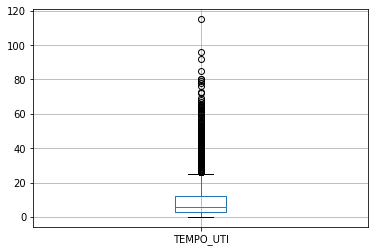

In [ ]:
srag.boxplot("TEMPO_UTI")

#### **Análise dos valores únicos de cada atributo**

Por fim, verificou-se quais são os valores únicos das demais features do dataset. Vale ressaltar que além dos dados nulos, alguns campos possuem o valor `9` para demarcar que o campo foi ignorado no ato da notificão. Portanto, os dois casos precisam ser devidamente tratados na etapa de pré-processamento.

In [ ]:
desconsiderar = set(colunas_datatime) | set(['NU_IDADE_N', 'SG_UF', 'TEMPO_INTER', 'TEMPO_UTI'])
for coluna in set(srag.columns) - desconsiderar:
    print(coluna, srag[coluna].unique())

PNEUMOPATI [nan  2.  1.  9.]
HEMATOLOGI [nan  2.  9.  1.]
CS_SEXO ['F' 'M' 'I']
CLASSI_FIN [5. 4. 3. 1. 2.]
DISPNEIA [ 1.  2. nan  9.]
HEPATICA [nan  2.  9.  1.]
DIARREIA [ 1.  2. nan  9.]
HOSPITAL [ 1.  2. nan  9.]
PERD_PALA [nan  2.  1.  9.]
FEBRE [ 1.  2. nan  9.]
DESC_RESP [nan  1.  2.  9.]
GARGANTA [nan  2.  1.  9.]
RENAL [nan  2.  1.  9.]
OBESIDADE [nan  2.  9.  1.]
IMUNODEPRE [nan  2.  1.  9.]
SEM_NOT [ 1  2 15  3  4  5  6  7  8  9 10 11 14 12 13 16 17 18]
SUPORT_VEN [ 2.  3. nan  9.  1.]
NEUROLOGIC [ 1. nan  2.  9.]
DOR_ABD [nan  2.  1.  9.]
SIND_DOWN [nan  2.  9.  1.]
FADIGA [nan  2.  1.  9.]
ASMA [nan  2.  9.  1.]
SATURACAO [ 1.  2. nan  9.]
VOMITO [nan  2.  1.  9.]
TOSSE [ 1.  2. nan  9.]
FATOR_RISC ['S' 'N']
CARDIOPATI [ 1. nan  2.  9.]
EVOLUCAO [ 2.  1. nan  3.  9.]
TP_IDADE [3 2 1]
PERD_OLFT [nan  2.  1.  9.]
PUERPERA [nan  2.  9.  1.]
UTI [ 2.  1. nan  9.]
DIABETES [nan  1.  2.  9.]


## **4 Pré-processamento**

### **4.1 Pré-processamento - CNVCC**

Foram selecionados alguns bjetivos principais para a etapa de pré-processamento do conjunto de dados CNVCC, são eles:  
1. Diminuir o tamanho do arquivo volume de armazenamento do arquivo;
2. Tratar os casos de incosistência e dados nulos;
3. Simplificar a estrutura do dataset para a análise.

In [ ]:
cnvcc = pd.read_csv('Datasets/CNVCC/CNVCC - Nordeste.csv')

In [ ]:
cnvcc.head()

,paciente_id,paciente_idade,paciente_enumSexoBiologico,estabelecimento_uf,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome
0,6b16f0c5e10a74e22ad7f043d723f475cf6b1f349db2d159965d2b76eee68964,23.0,F,MA,Trabalhadores de Saúde,2021-04-30T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield
1,d7390505c9f33725adf5af0de73e5924bdd4db1154b3ad9960902207e71dacee,73.0,F,MA,Faixa Etária,2021-03-11T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan
2,3aec5e352cba8ad396136966088797ec45e9b29aebd136bb744164da0bffa571,61.0,F,MA,Faixa Etária,2021-04-29T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield
3,fafb9a784ebdf54d418b37c1b0e0260cf371c16ead72c6cbafff9fd8c196a00e,23.0,F,MA,Povos Indígenas,2021-03-12T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan
4,1b518f76d0415ffdb07e65f875db7f6a8a6ec741748375818a635a4182463620,70.0,F,MA,Faixa Etária,2021-04-29T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan


Para melhorar a manipulação dos dados, a data de aplicação da vacina precisou ser padronizada. Para tanto, as seguintes decisões foram tomadas.  

1. Como buscou-se analisar apenas os dados referentes a Campanha Nacional de Vacinação, removemos os registros que antecedem o ano de 2021, uma vez que são poucos. Dentro das instâncias removidas também estão as instâncias com datas preenchidas erradas.

In [ ]:
#Seleciona as instancias para remocao
remover = cnvcc[cnvcc['vacina_dataAplicacao'].str[:4] != '2021']
remover.shape

(19, 8)

In [ ]:
#Remove instancias
cnvcc = cnvcc[~cnvcc['paciente_id'].isin(remover['paciente_id'])]

2. Padronização do formato de representação da data de aplicação da vacina para o tipo datatime no formato `yyyy/mm/dd`.

In [ ]:
#Seleciona apenas dia, mês e ano da data
cnvcc.loc[:, 'vacina_dataAplicacao'] = cnvcc.vacina_dataAplicacao.str[:10]
#Converte para datatime
cnvcc['vacina_dataAplicacao'] = pd.to_datetime(cnvcc['vacina_dataAplicacao'], dayfirst=True)

3. Como foram identificadas instâncias repetidas, mesmo paciente com multiplos registros, esses casos precisaram ser tratados para não gerar imprecisão em analises futuras. Portanto, decidiu-se por manter apenas o registro mais antigo de um paciente para cada aplicação da vacina.

In [ ]:
#Ordenação do dataset por data
cnvcc = cnvcc.sort_values('vacina_dataAplicacao')

#Remove os registros multiplos do paciente
cnvcc = cnvcc.drop_duplicates(subset=['paciente_id', 'vacina_descricao_dose'], keep='first')

Como as perguntas propostas pelo trabalho buscam analisar apenas questões relacionada a vacinas baseadas na aplicação em duas doses, as instâncias referentes a vacinada da Janssen-Cilag, que é de dose única, foram removidas do dataset. Além disso, vale ressaltar que apenas 49 pacientes tomaram essa vacina, portanto, essa decisão não ocasiona em uma perda significativa da precisão de analises posteriores.

In [ ]:
#Numero de vacinados pela vacina da janssen
cnvcc[cnvcc['vacina_nome'] == 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag'].shape

(49, 8)

In [ ]:
#Remove instancias que tomaram a vacina da janssen
cnvcc = cnvcc[cnvcc['vacina_nome'] != 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag']

A fim de economizar espaço de armazenamento, a descrição da dose foi susbtituída por números de indentificação.

In [ ]:
#Padroniza o atributo vacina_descricao_dose
cnvcc.loc[cnvcc['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose', 'vacina_descricao_dose'] = 1
cnvcc.loc[cnvcc['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa02ª\xa0Dose', 'vacina_descricao_dose'] = 2

A fim de economizar espaço de armazenamento, os nomes das vacinas também foram susbtituídos por números de indentificação. 

In [ ]:
#Padroniza o atributo vacina_nome
nome_vacinas = sorted(cnvcc['vacina_nome'].unique())

for index, vacina in enumerate(nome_vacinas):
    cnvcc.loc[cnvcc['vacina_nome'] == vacina, 'vacina_nome'] = index+1

In [ ]:
nome_vacinas

['Covid-19-AstraZeneca',
 'Covid-19-Coronavac-Sinovac/Butantan',
 'Vacina Covid-19 - Covishield',
 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag',
 'Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer']

Para economizar um volume significativo de espaço em memória e facilitar a manipulação do dataset para posterior análise, ele foi estratégicamente normalizado. Para tanto, cada registro passou a armazenar as informações sobre a aplicação da primeira e segunda dose. Assim, uma única instância passa a armazenar todas as informações sobre a mesma entidade, evitando armazenamento de atributos repetidos.

In [ ]:
#Normalização do dataset

#Dataset apenas com os dados sobre o paciente
dataset_normalizado = cnvcc[['paciente_id', 'paciente_idade', 'paciente_enumSexoBiologico',
                              'estabelecimento_uf', 'vacina_categoria_nome']]

#Remoção de duplicados, para ter apenas um registro por paciente
dataset_normalizado = dataset_normalizado.drop_duplicates(subset='paciente_id')

#Dataset primeira dose
primeira_dose_colunas = {'vacina_dataAplicacao': 'data_aplicacao_1', 'vacina_nome': 'nome_vacina_1'}

primeira_dose = cnvcc[cnvcc['vacina_descricao_dose'] == 1]
primeira_dose = primeira_dose[['paciente_id', 'vacina_dataAplicacao', 'vacina_nome']]
primeira_dose = primeira_dose.rename(columns=primeira_dose_colunas)
primeira_dose['primeira_dose'] = 1

#Dataset segunda dose
segunda_dose_colunas = {'vacina_dataAplicacao': 'data_aplicacao_2', 'vacina_nome': 'nome_vacina_2'}

segunda_dose = cnvcc[cnvcc['vacina_descricao_dose'] == 2]
segunda_dose = segunda_dose[['paciente_id', 'vacina_dataAplicacao', 'vacina_nome']]
segunda_dose = segunda_dose.rename(columns=segunda_dose_colunas)
segunda_dose['segunda_dose'] = 1

#Outer join dos datasets, para formar um dataset com informações sobre o paciente, primeira dose e segunda dose
merged = pd.merge(dataset_normalizado, primeira_dose, on='paciente_id', how='outer')
cnvcc = pd.merge(merged, segunda_dose, on='paciente_id', how='outer')
 
#Preenche os nulos com zero, para indificar quando dose não foi tomada
cnvcc = cnvcc.fillna({'primeira_dose': 0, 'nome_vacina_1': 0, 'segunda_dose': 0, 'nome_vacina_2': 0})

#Desaloca variáveis
del primeira_dose
del segunda_dose
del dataset_denormalizado

Os nomes das colunas foram renomeados e ordenados a fim de melhor indentificar as features e simplificar consultas posteriores.

In [ ]:
#Renomeação das colunas
novas_colunas = {'paciente_id':'id', 'paciente_idade':'idade', 'paciente_enumSexoBiologico': 'sexo', 
                 'estabelecimento_uf': 'estado', 'vacina_categoria_nome': 'categoria_vacinacao'}

cnvcc = cnvcc.rename(columns=novas_colunas)

#Ordenação das colunas
cnvcc = cnvcc[['id', 'idade', 'sexo', 'estado', 'categoria_vacinacao', 
               'primeira_dose', 'data_aplicacao_1', 'nome_vacina_1',
               'segunda_dose', 'data_aplicacao_2', 'nome_vacina_2']]

Os tipos de dados das colunas foram explicitamente definidos para assegurar consistência.

In [ ]:
#Define os tipos de dados das colunas
data_types = {'idade':np.int32, 'primeira_dose':np.int32, 'nome_vacina_1':np.int32, 'segunda_dose':np.int32, 'nome_vacina_2':np.int32}
cnvcc = cnvcc.astype(data_types)

Os dados nulos da coluna `categoria_vacinacao`, percebidos durante a exploração inicial, foram preenchidos como `Não informada` uma vez que denotam os casos em que a categoria não foi informada.

In [ ]:
#Trata nulos da coluna "categoria_vacinacao"
cnvcc.loc[cnvcc['categoria_vacinacao'].isnull(), 'categoria_vacinacao'] = 'Não Informada'

Organização final do dataset após a limpeza e transformação dos dados.

In [ ]:
cnvcc.head()

Por fim, o dataset é exportado para uso posterior.

In [ ]:
#Exporta Dataset
cnvcc.to_csv('Datasets/CNVCC/CNVCC - Nordeste2.csv', index=False)

### **4.2 Pré-processamento - SRAG**

In [ ]:
srag = pd.read_csv('Datasets/SRAG/SRAG - Nordeste.csv')

In [ ]:
srag.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,TP_IDADE,SG_UF,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA
0,06/01/2021,1,03/01/2021,F,80,3,PE,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,S,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,05/01/2021,2.0,NaN,NaN,2.0,5.0,2.0,13/01/2021
1,08/01/2021,1,04/01/2021,F,1,3,PB,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,08/01/2021,2.0,NaN,NaN,3.0,5.0,1.0,10/01/2021
2,11/01/2021,2,05/01/2021,F,68,3,BA,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,S,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,09/01/2021,1.0,09/01/2021,19/01/2021,3.0,4.0,1.0,25/01/2021
3,14/04/2021,15,12/04/2021,M,87,3,BA,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,05/04/2021,2.0,NaN,NaN,3.0,4.0,NaN,NaN
4,03/01/2021,1,03/01/2021,F,54,3,AL,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,03/01/2021,NaN,NaN,NaN,NaN,5.0,1.0,14/01/2021


A coluna `TP_IDADE` informa se a idade está representada em dia, mês ou ano. Como a representação mais relavante para o estudo é em anos, e tratar cada caso dificultaria a manipulação do dataset, idades representadas em dia e mês foram convertidas para seu equivalente ano.

In [ ]:
srag[srag['TP_IDADE'] == 1]['NU_IDADE_N'].unique()

array([23,  0, 10,  1, 25,  7, 11,  3,  5,  8, 26, 27, 18,  6, 16, 13, 12,
       19,  2, 14, 21,  9, 22, 17,  4, 20, 15, 24, 28])

In [ ]:
srag[srag['TP_IDADE'] == 2]['NU_IDADE_N'].unique()

array([ 1,  4,  7,  3,  2,  5,  8, 11,  6, 10,  9,  0])

Verificou-se acima que todas as idades representadas em dia e mês compreendem a faixa de 0 anos. Portanto, foram convertidas para esse valor em anos e a coluna `TP_IDADE` foi removida.

In [ ]:
#Converte idade representadas em dia e mes para ano
srag.loc[srag['TP_IDADE'] == 1, 'NU_IDADE_N'] = 0
srag.loc[srag['TP_IDADE'] == 2, 'NU_IDADE_N'] = 0

In [ ]:
#Remove coluna
srag = srag.drop(columns='TP_IDADE')

Os atributos de sintomas e comorbidades apresentam quatro valores categóricos "Sim", "Não", "Ignorado" e nulo, representados respectivamente por 1, 2, 9 e nan. Portanto, decidiu-se por interpretar os dados nulos como ignorados, essa decisão busca padronizar os dados e não interfere nas estatísticas analisadas. Em sequência, decidiu-se por tratar a categoria "Ignorado", que agora inclui os nulos, como "Não", e se sustenta na hipôtese de que atributos foram marcados como "Ignorado" deliberadamente, porque sua determinação não era relevante para o contexto. Além disso, considerou-se que essas decisões provocariam pouco impacto nos resultados, uma vez que são possibilidades plausíveis.

In [ ]:
#Transformação de dados nulos e marcados como ignorados
colunas = ['SIND_DOWN', 'TOSSE', 'DESC_RESP', 'DOR_ABD', 'SATURACAO', 'IMUNODEPRE', 'OBESIDADE', 'DIARREIA', 
           'PERD_OLFT', 'FEBRE', 'RENAL', 'PNEUMOPATI', 'ASMA', 'NEUROLOGIC', 'FADIGA', 'DIABETES', 'DISPNEIA',
           'PUERPERA', 'CARDIOPATI', 'GARGANTA', 'HEMATOLOGI', 'HEPATICA', 'SUPORT_VEN', 'PERD_PALA', 'VOMITO']

srag.loc[:,colunas] = srag[colunas].fillna(9)
srag.loc[:,colunas] = srag[fatores_de_risco].replace(9, 2)

Seguindo a primeira hipótese os dados nulos de `UTI`, `HOSPITAL` e `EVOLUCAO` foram preechidos como "Ignorados". 

In [ ]:
#Tratamento de nulos
colunas = ['UTI', 'HOSPITAL', 'EVOLUCAO']
srag.loc[:,colunas] = srag[colunas].fillna(9)

A segunda hipótese pode ser testada para os atributos descritos acima. Dessa forma, ela foi avaliada e confirmada, segue abaixo as hipóteses que a confirmam para esses atributos.
1. Se nenhum paciente com o atributo "HOSPITAL" marcado como "ignorado" registou data de internação, ele não foi internado.
2. Se nenhum paciente com o atributo "UTI" marcado como "ignorado" registou data de internação na UTI, ele não foi internado na UTI.

In [ ]:
#1. Nenhum paciente com o campo "HOSPITAL" ignorado registou data de internação
srag[(srag['HOSPITAL'] == 9) & (srag['DT_INTERNA'].notnull())]

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,SG_UF,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA


In [ ]:
#2. Nenhum paciente com o campo "UTI" ignorado registou data de internação na UTI
srag[(srag['UTI'] == 9) & (srag['DT_ENTUTI'].notnull())]

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,SG_UF,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA


Como a segunda hipótese foi confirmada para os atributos `UTI`, `HOSPITAL` e `EVOLUCAO`, seus dados foram marcados como "Ignorado" e transformados em "Não".

In [ ]:
#Instâncias com o campo "HOSPITAL" ignorado foram preenchidos como: não internados. 
srag.loc[srag['HOSPITAL'] == 9, 'HOSPITAL'] = 2
#Instâncias com o campo "UTI" ignorado foram preenchidos como: não internados na UTI.
srag.loc[srag['UTI'] == 9, 'UTI'] = 2

Os atributos que representam data foram convertidos para datatime para facilitar a análise posterior por um formato conveniente.

In [ ]:
#Converte para datetime
colunas_datatime = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_ENTUTI', 'DT_SAIDUTI', 'DT_EVOLUCA']

for coluna in colunas_datatime:
    srag[coluna] = pd.to_datetime(srag[coluna], errors="coerce", dayfirst=True)

O dataset teoricamente deveria ter apenas notificações do ano de 2021. Desse modo, a fim de garantir a consistência dos dados, instâncias com outras datas foram removidas.

In [ ]:
#Remove datas inválidas
for column in colunas_datatime:
    srag = srag[(srag[column].dt.year == 2021) | (srag[column].isnull())]

Por fim, obteve-se as colunas referentes ao tempo de internação(`TEMPO_INTER`) no hospital e tempo de internação na UTI(`TEMPO_UTI`), atributos necessários as análises posteriores.

In [ ]:
#Colunas tempo de internação e UTI (datatime)
srag["TEMPO_INTER"] = srag["DT_EVOLUCA"] - srag["DT_INTERNA"]
srag["TEMPO_UTI"] = srag["DT_SAIDUTI"] - srag["DT_ENTUTI"]

#Conversão para dias (inteiro)
for column in ['TEMPO_INTER', 'TEMPO_UTI']:
    srag.loc[srag[column].notnull(), column] = srag[column].dt.days

Por fim, o dataset é exportado para uso posterior.

In [ ]:
srag.to_csv('Datasets/SRAG/SRAG - Nordeste2.csv', index=False)

## **5 Perguntas**

### 1. Proporção de pacientes que tomaram a primeira dose da vacina, mas não tomaram a segunda dose dentro do período de tempo estabelecido pelo fabricante da vacina.

In [ ]:
cnvcc = pd.read_csv("Datasets/CNVCC/CNVCC - Nordeste2.csv")

In [ ]:
cnvcc.head()

,id,idade,sexo,estado,categoria_vacinacao,primeira_dose,data_aplicacao_1,nome_vacina_1,segunda_dose,data_aplicacao_2,nome_vacina_2
0,80a9a6b3b420e62ef72af97109c2b5e19c31be5a51443e98ade139d5c0b4bba7,40,M,BA,Trabalhadores de Saúde,1,2021-01-01,2,1,2021-03-03,2
1,ade18a9f602f43b0913e58dd0017ab948ade12b9d93dfadbb1c671ef08c6184d,59,F,RN,Trabalhadores de Saúde,1,2021-01-01,1,1,2021-04-12,1
2,b9df4cc60d2a4ca7322487617364dbf488507ab76f5e75693c4ec19e608dbff3,28,M,CE,Trabalhadores de Saúde,1,2021-01-01,2,1,2021-02-22,2
3,540ed555c1d833a469d4ab4fc50e8d521eb13987d52f0bb146786913d4842714,42,F,BA,Trabalhadores de Saúde,1,2021-01-01,2,1,2021-03-01,2
4,7149bde02e21ff14d09cebe2e811b8b825754e8ed3fbe78c78efd0966a6dd91c,46,F,BA,Trabalhadores de Saúde,1,2021-01-01,2,1,2021-03-01,2


Para responder a pergunta de maneira confiável, foi necessário dividir a solução em duas abordagens, uma vez que existem pacientes que não tomaram as duas doses. Cada caso precisou ser tratado em suas particularidade e considerando as limitações da suas interpretações.

A primeira abordagem consiste em analisar os casos em que os pacientes tomaram as duas doses, assim pode-se verificar o cumprimento do prazo mínimo e máximo. Segue, o pipeline da solução:
1. Selecionar, os pacientes que tomaram as duas doses da vacina, obter o intervalo de dias entre a aplicação das duas doses e verificar a quantidade de pacientes que tomaram a segunda dose fora do intervalo mínimo e máximo indicado pelas fabricantes das respectivas vacinas.  

A segunda abordagem consiste em analisar os casos em que os pacientes tomaram apenas a primeira dose, portanto, podemos apenas verificar o cumprimento do prazo máximo até a data de publicação do dataset. Segue, o pipeline da solução:  

2. Selecionar, os pacientes que tomaram apenas a primeira vacina, preencher a data da segunda dose com a data da disponibilização dos dados, obter o intervalo de dias entre a aplicação das duas doses e verificar a quantidade de pacientes que extrapolaram o prazo máximo.

Excepcionalmente a não encontramos prazo mínimo para a vacina da Pfizer, portanto, analisamos apenas seu prazo máximo.

**Primeira abordagem**

In [ ]:
#Seleção de todos aqueles que tomaram as duas doses da vacina
cnvcc1 = cnvcc[(cnvcc["primeira_dose"] == 1) & (cnvcc["segunda_dose"] == 1)]

In [ ]:
#Adequação das datas ao formato conveniente para para processamento
cnvcc1["data_aplicacao_1"] = pd.to_datetime(cnvcc1["data_aplicacao_1"])
cnvcc1["data_aplicacao_2"] = pd.to_datetime(cnvcc1["data_aplicacao_2"])

In [ ]:
#Criação da nova coluna que armazena o intervalo entra a data da primeira e segunda dose da vacina 
cnvcc1["dias_entre_doses"] = (cnvcc1["data_aplicacao_2"] - cnvcc1["data_aplicacao_1"]).dt.days

In [ ]:
#Determinacao do numero dos vacinados fora do periodo estabelecido pelo fabricante de cada vacina
fora_do_intervalo = 0

#Astrazeneca 28 e 84 dias
fora_do_intervalo += cnvcc1[(cnvcc1["nome_vacina_1"] == 1) & 
                            ((cnvcc1["dias_entre_doses"] < 28) | (cnvcc1["dias_entre_doses"] > 84))].shape[0]

#CoronaVac 14 e 28 dias
fora_do_intervalo += cnvcc1[(cnvcc1["nome_vacina_1"] == 2) & 
                            ((cnvcc1["dias_entre_doses"] < 14) | (cnvcc1["dias_entre_doses"] > 28))].shape[0]

#CoviShield 28 e 84 dias
fora_do_intervalo += cnvcc1[(cnvcc1["nome_vacina_1"] == 3) & 
                            ((cnvcc1["dias_entre_doses"] < 28) | (cnvcc1["dias_entre_doses"] > 84))].shape[0]
      
#Pfizer maxima de 21 dias
fora_do_intervalo += cnvcc1[(cnvcc1["nome_vacina_1"] == 4) & (cnvcc1["dias_entre_doses"] > 21)].shape[0]

**Segunda abordagem**

In [ ]:
#Seleção de todos aqueles que tomaram apena a primeira dose da vacina
cnvcc2 = cnvcc[(cnvcc["primeira_dose"] == 1) & (cnvcc["segunda_dose"] == 0)]

In [ ]:
#Setando a data da segunda dose (data limite) como a data de publicacao do dataset
cnvcc2 = cnvcc2.fillna(value = {"data_aplicacao_2": pd.Timestamp("2021-05-05")})

In [ ]:
#Adequação das datas ao formato conveniente para para processamento
cnvcc2["data_aplicacao_1"] = pd.to_datetime(cnvcc2["data_aplicacao_1"])
cnvcc2["data_aplicacao_2"] = pd.to_datetime(cnvcc2["data_aplicacao_2"])

In [ ]:
#Criação da nova coluna que armazena o intervalo de tempo entre a data da primeira dose e a data limite
cnvcc2["dias_entre_doses"] = (cnvcc2["data_aplicacao_2"] - cnvcc2["data_aplicacao_1"]).dt.days

In [ ]:
#Astrazeneca 28 e 84 dias
fora_do_intervalo += cnvcc2[(cnvcc2["nome_vacina_1"] == 1) & (cnvcc2["dias_entre_doses"] > 84)].shape[0]

#CoronaVac 14 e 28 dias
fora_do_intervalo += cnvcc2[(cnvcc2["nome_vacina_1"] == 2) & (cnvcc2["dias_entre_doses"] > 28)].shape[0]

#CoviShield 28 e 84 dias
fora_do_intervalo += cnvcc2[(cnvcc2["nome_vacina_1"] == 3) & (cnvcc2["dias_entre_doses"] > 84)].shape[0]

#Pfizer maxima de 21 dias
fora_do_intervalo += cnvcc2[(cnvcc2["nome_vacina_1"] == 4) & (cnvcc2["dias_entre_doses"] > 21)].shape[0]

In [ ]:
print(f'Número de vacinados fora do intervalo recomendado pelas fabricantes de vacina: {fora_do_intervalo}')

Número de vacinados fora do intervalo recomendado pelas fabricantes de vacina: 1996108


Considerando os indivíduos que tomaram duas doses da vacina, e aqueles indivíduos que tomaram apenas uma, mas destes últimos desconsiderados aqueles indivíduos que apresentam intervalo entre as doses inferior ao estabelecido pelos fabricantes. Bem como tomado a data de disponibilidade do dataset na devida plataforma como data limite temos que aproximadamente 25,37% dos vacinados apresentam um intervalo entre as doses da vacina não compatível com aquele indicado pelos fabricantes.

### 2. Quantidade de pessoas que tomaram doses de vacinas de fabricantes diferentes.

In [ ]:
#Número de pessoas que tomaram doses de vacinas diferentes
doses_diferentes = cnvcc1[cnvcc1["nome_vacina_1"] != cnvcc1["nome_vacina_2"]].shape[0]

In [ ]:
print(f'Número de pacientes que tomaram doses de vacinas diferentes: {doses_diferentes}')

Descobrimos que 16163 pacientes tomaram vacinas de abricantes diferentes. Essa é uma quantidade de significativa de pessoa e demonstra fragilidades no monitoramento dos pacientes assistidos pela Campanha Nacional de Vacinação. 

### 3. Análise da porcentagem de vacinados em cada estado do nordeste em relação às suas respectivas populações, a fim de verificar se o estado optou por vacinar o maior número de pessoas com a primeira dose, aumentando o intervalo entre as doses, ou vacinar o maior número de pessoas com as duas doses, reduzindo esse intervalo.

In [ ]:
#Populações dos estados do nordeste brasileiro
pop_estado = pd.Series({'AL': 3322820, 'BA': 14812617, 'CE': 9075649, 'MA': 7035055, 'PB': 3996496, 
                        'PE': 9496294, 'PI': 3264531, 'RN': 3479010, 'SE': 2278308})

In [ ]:
#Porcentagem por estado da populacao vacinada com a primeira dose da vacina
primeira_dose = cnvcc[cnvcc["primeira_dose"] == 1].groupby('estado').size() / pop_estado

#Porcentagem por estado da populacao vacinada com as duas doses da vacina
segunda_dose = cnvcc[cnvcc["segunda_dose"] == 1].groupby('estado').size() / pop_estado

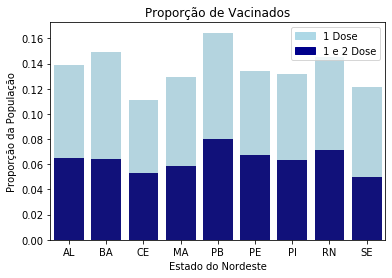

In [ ]:
import matplotlib.patches as mpatches

#Proporção de vacinados com apenas a 1 dose e proporção de vacinados com as duas doses
bar1 = sns.barplot(x=primeira_dose.index,  y=primeira_dose, color='lightblue')
bar2 = sns.barplot(x=segunda_dose.index, y=segunda_dose, color='darkblue')

top_bar = mpatches.Patch(color='lightblue', label='1 Dose')
bottom_bar = mpatches.Patch(color='darkblue', label='1 e 2 Dose')
plt.legend(handles=[top_bar, bottom_bar])

plt.xlabel('Estado do Nordeste', fontsize=10)
plt.ylabel('Proporção da População', fontsize=10)

plt.title('Proporção de Vacinados')
plt.show()

Pela observação gráfica não é possível encontrar diferenças significativas que possam indicar estratégias diferentes entre os estados do Nordeste em relação as escolhas de vacinar primeiro a maior parte da população com a primeira dose ou vacinar primeiro a maior parte da população com as duas doses. Outras estatísticas e pesquisas são necessárias para fornecer os subsídios necessários à essa compreensão. 

### 4. A taxa de mortalidade por SRAGs por estado do nordeste brasileiro 2021. 

In [ ]:
srag = pd.read_csv('Datasets/SRAG/SRAG - Nordeste2.csv')

In [ ]:
srag.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,SG_UF,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,TEMPO_INTER,TEMPO_UTI
0,2021-01-06,1,2021-01-03,F,80,PE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2021-01-05,2.0,NaN,NaN,NaN,5.0,2.0,2021-01-13,8.0,NaN
1,2021-01-08,1,2021-01-04,F,1,PB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2021-01-08,2.0,NaN,NaN,NaN,5.0,1.0,2021-01-10,2.0,NaN
2,2021-01-11,2,2021-01-05,F,68,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2021-01-09,1.0,2021-01-09,2021-01-19,NaN,4.0,1.0,2021-01-25,16.0,10.0
3,2021-04-14,15,2021-04-12,M,87,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2021-04-05,2.0,NaN,NaN,NaN,4.0,9.0,NaN,NaN,NaN
4,2021-01-03,1,2021-01-03,F,54,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2021-01-03,2.0,NaN,NaN,NaN,5.0,1.0,2021-01-14,11.0,NaN


In [ ]:
#Seleção dos casos por estado
casos_estado = srag.groupby('SG_UF').size()
#Seleção dos casos de obitos por estado
obitos_estado = srag[srag['EVOLUCAO'] == 2].groupby('SG_UF').size()

#Calculo da mortalidade
mortalidade = (obitos_estado / pop_estado) * 100
mortalidade = mortalidade.sort_values(ascending=False)

#Calculo da letalidade
letalidade  = (obitos_estado / casos_estado) * 100
letalidade = letalidade.sort_values(ascending=False)

**Mortalidade**

Dentre os estados do nordeste brasileiro, com a terceira maior população, o Ceará se destaca como o estado com maior taxa de mortalidade. Com a menor população do nordeste, Sergipe destaca-se como o terceiro estado com maior taxa de mortalidade. Em contraponto, o estado de Pernambuco, que possui a segunda maior população do nordeste, encontra-se na última posição no ranking de taxa de mortalidade. 

Text(0.5, 0.98, 'Mortalidade x Estado do Nordeste')

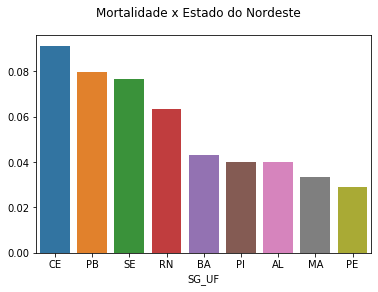

In [ ]:
sns.barplot(x=mortalidade.index, y=mortalidade)
plt.suptitle('Mortalidade x Estado do Nordeste')

**Letalidade**

Considerando os estados do nordeste brasileiro, o Ceará destaca-se como o estado com maior taxa de letalidade. O estado do Maranhão, penúltimo no ranking de taxa de mortalidade, possui a segunda maior taxa de letalidade. Em paralelo, o estado de Alagoas possui a menor taxa de letalidade do Nordeste. 

Text(0.5, 0.98, 'Letalidade x Estado do Nordeste')

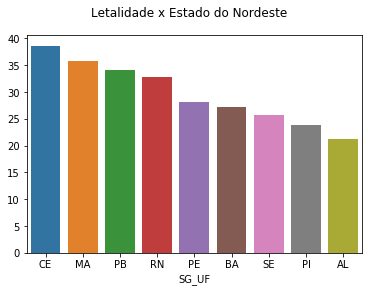

In [ ]:
sns.barplot(x=letalidade.index, y=letalidade)
plt.suptitle('Letalidade x Estado do Nordeste')

### 5. Média e desvio padrão do tempo de internação de pacientes com Covid-19, no hospital e na UTI.

In [ ]:
#Seleciona os pacientes de Covid-19
casos_covid = srag[srag['CLASSI_FIN'] == 5]

In [ ]:
stats_internacao_h = casos_covid['TEMPO_INTER'].describe()
print(f"Tempo de Internação no Hospital")
print(f"Tempo Médio = {stats_internacao_h['mean']:.2f}")
print(f"Tempo Mediano = {stats_internacao_h['50%']:.2f}")
print(f"Desvio Padrão = {stats_internacao_h['std']:.2f}")

Tempo de Internação no Hospital
Tempo Médio = 9.58
Tempo Mediano = 7.00
Desvio Padrão = 8.81


In [ ]:
stats_internacao_uti = casos_covid['TEMPO_UTI'].describe()
print(f"Tempo de Internação na UTI")
print(f"Tempo Médio = {stats_internacao_uti['mean']:.2f}")
print(f"Tempo Mediano = {stats_internacao_uti['50%']:.2f}")
print(f"Desvio Padrão = {stats_internacao_uti['std']:.2f}")

Tempo de Internação na UTI
Tempo Médio = 9.16
Tempo Mediano = 7.00
Desvio Padrão = 8.66


Em constraste com o que foi constatado na exploração incial. Após a etapa de pré-processamento com os dados inconsistentes removidos, o tempo de internação no Hospital e o Tempo de internação na UTI demonstram ser estatisticamente próximos.  Mais ainda sim, evidencia um dos maiores problemas gerados pela Covid-19 longo tempo de internação, o que resulta na falta de leitos de UTI. 

### 6. Para cada comorbidade, encontrar a porcentagem de pessoas com essa comorbidade que sobreviveu ou foi a óbito. 

In [ ]:
#Casos tem classificação de cura ou obito
covid_encerrados = casos_covid[casos_covid['EVOLUCAO'].isin([1, 2])]
covid_encerrados = covid_encerrados.replace({'EVOLUCAO': {1: 'Cura', 2: 'Obito'}})

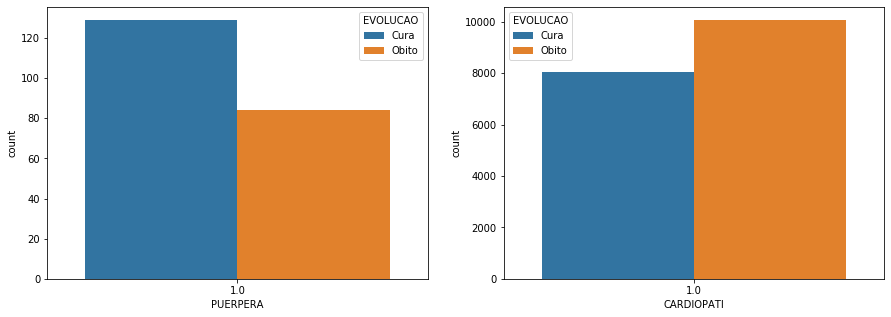

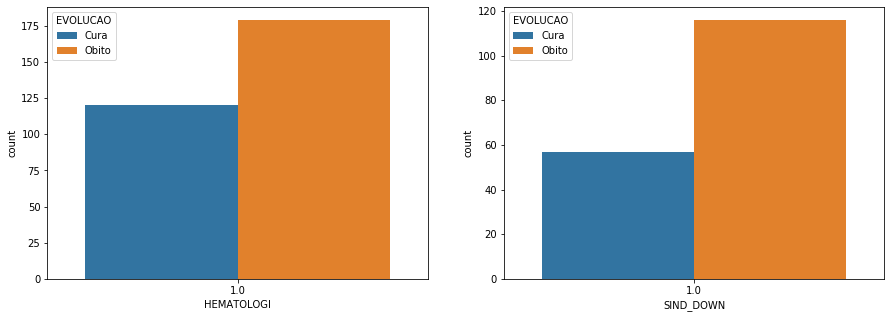

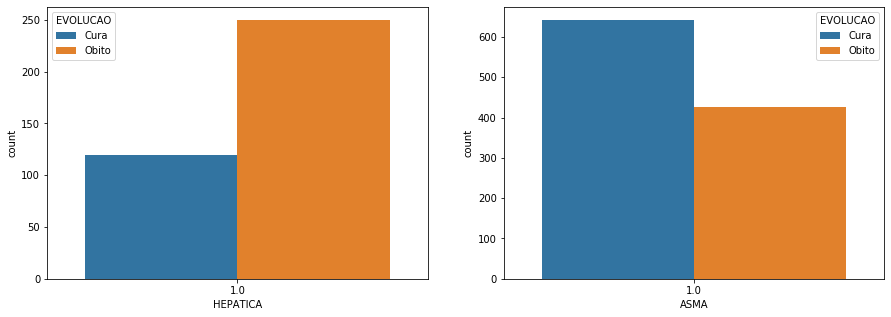

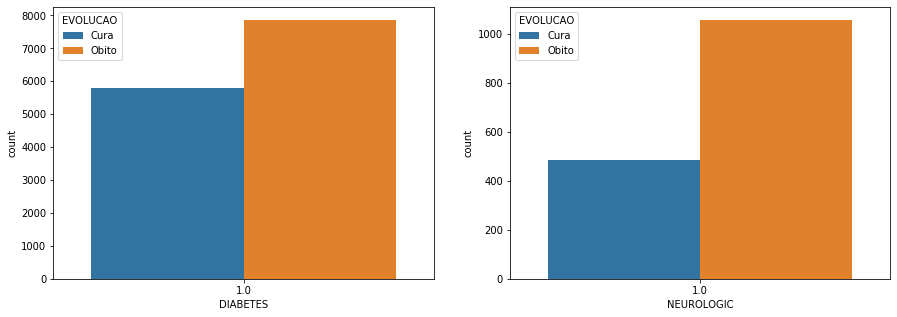

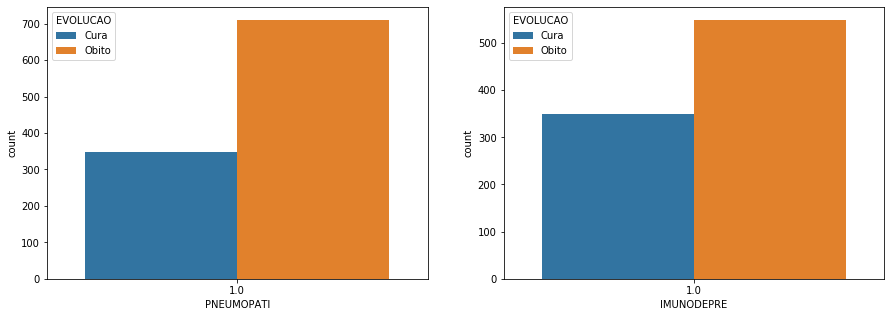

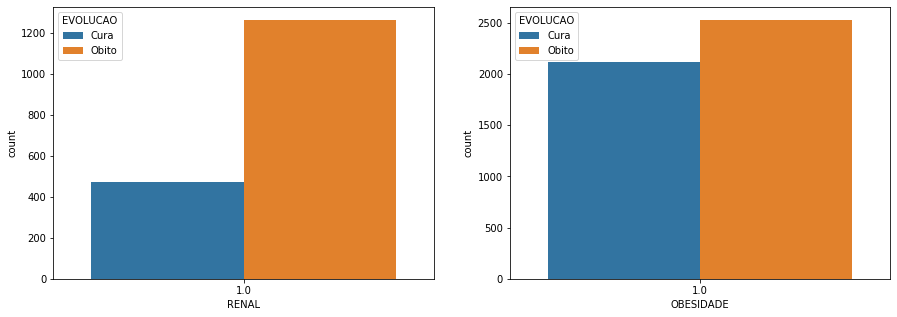

In [ ]:
#Geração do Gráfico
palette = {'Cura': "C0", 'Obito': "C1"}

for index, fator in enumerate(fatores_de_risco):
    pacientes = covid_encerrados[covid_encerrados[fator] == 1]
    if (index+1) % 2 != 0:
        figure, axes = plt.subplots(1, 2, figsize=(15,5))
        
    sns.countplot(data=pacientes, x=fator, hue='EVOLUCAO', hue_order=['Cura','Obito'],
                  palette=palette,ax=axes[index%2])
    
    if (index+1) % 2 == 0:
        plt.show()

Esses gráficos são muito importantes e são usados como fundamento para entender o impacto que as comorbidades tem no progresso da doença em pacientes saúdaveis. Desse modo, pode-se chegar a alguns resultados relevantes e que merecem análise posterior. Pacientes com problemas renais, hepaticos, pneumopaticos e imunodepressivos estão entre os grupos mais vulneráveis. Objetivando aprofundar a análise do impacto das comorbidades na evolução da doença, desenvolveu-se um classificador para avaliar a influência desses aspectos no probabilidade de sobrevivencia e morte dos pacientes de Covid-19.

### 7. Análise de impacto dos sintomas e/ou comorbidades na evolução dos casos de pacientes com Covid-19

Para resposta da pergunta, foi desenvolvido um classificador a fim de predizer a evolução dos casos dos pacientes considerando seus sintomas e/ou comorbidades. A motivação primordial baseou-se em analisar o peso estatístico desses fatores para determinar seus impactos nos óbitos por COVID-19. Para tanto, foram utilizados os dados do conjunto de dados SRAG e algoritmos supervisionados para realizar a classificação entre Óbito e Cura.

**Dicionário de Dados:**

https://opendatasus.saude.gov.br/dataset/9f76e80f-a2f1-4662-9e37-71084eae23e3/resource/b3321e55-24e9-49ab-8651-29cf5c8f3179/download/dicionario-de-dados-srag-hospitalizado-27.07.2020-final.pdf

<br>

**Atributos utilizados:**

'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',' SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'CARDIOPATI', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'RENAL', 'IMUNODEPRE', 'SUPORT_VEN', 'OBESIDADE', 'NU_IDADE_N','CLASSI_FIN', 'HOSPITAL', 'UTI', 'EVOLUCAO'.

<br/> 


**Informações sobre as classes:** 

Armazenadas na coluna **'EVOLUCAO'** as classes se subdividem em:

1 = Óbito

0 = Cura




---



**Pré-processamento dos dados**

Inicialmente, selecionamos apenas as colunas  referentes aos sintomas, comorbidades, internação e evolução dos casos dos pacientes:

In [ ]:
#Variável global
random_state = 42

srag = pd.read_csv('/content/drive/MyDrive/Graduação/Ciência de Dados/Projeto/Análises/SRAG - Nordeste2.csv')

#Selecionando as colunas do dataset
srag = srag[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
            'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 
            'CARDIOPATI', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'RENAL',
            'IMUNODEPRE', 'SUPORT_VEN', 'OBESIDADE', 'NU_IDADE_N','CLASSI_FIN', 
            'HOSPITAL', 'UTI', 'EVOLUCAO']]
srag

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,CARDIOPATI,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,RENAL,IMUNODEPRE,SUPORT_VEN,OBESIDADE,NU_IDADE_N,CLASSI_FIN,HOSPITAL,UTI,EVOLUCAO
0,1.0,1.0,9.0,1.0,9.0,1.0,1.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0,9.0,1.0,9.0,9.0,9.0,2.0,9.0,80,5.0,1.0,2.0,2.0
1,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,3.0,9.0,1,5.0,1.0,2.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,68,4.0,1.0,1.0,1.0
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,87,4.0,1.0,2.0,9.0
4,9.0,1.0,9.0,9.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,54,5.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93526,1.0,1.0,9.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,35,5.0,1.0,2.0,9.0
93527,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,9.0,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,3.0,9.0,9,5.0,1.0,2.0,9.0
93528,1.0,1.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,9.0,2.0,9.0,96,5.0,1.0,2.0,9.0
93529,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,3.0,9.0,82,4.0,2.0,2.0,9.0


**Seleção das instâncias necessárias**

O conjunto de dados SRAG armazena dados de pacientes que possuem síndrome respiratória aguda grave de forma geral, não apenas pacientes acometidos pela COVID-19. Por esse motivo, foram selecionados apenas pacientes que possuíam SRAG por Covid-19. Em seguida, a coluna 'CLASSI_FIN' foi desconsiderada da análise.

In [ ]:
# Considerando apenas os pacientes com fatores de risco e com Covid-19
srag = srag[srag['CLASSI_FIN'] == 5.0]
srag = srag.drop(columns=['CLASSI_FIN'])

A coluna **'EVOLUCAO'** contém os seguintes valores:

**1** - Cura

**2** - Óbito

**3** - Óbito por outras causas

**9** - Ignorado

A análise trata-se exclusivamente de dados de pacientes que possuem SRAG por Covid-19. Por esse motivo, as instâncias de óbitos por outras causas foram desconsideras dessa análise.

In [ ]:
# Removendo as instâncias que possuíam o valor '3 - Óbitos por outras causas'
EVOLUCAO_remove = srag.loc[srag['EVOLUCAO'] == 3]
srag = srag.drop(EVOLUCAO_remove.index)

No conjunto de dados selecionado, os atributos **'HOSPITAL', 'UTI'** e **'EVOLUCAO'** contém os seguintes valores:  

**1** - Sim

**2** - Não

**9** - Ignorado 

Por esse motivo, foram consideradas apenas as instâncias que possuíam os valores 1 ou 2. 


In [ ]:
colunas = ['HOSPITAL', 'UTI', 'EVOLUCAO']

for coluna in colunas:
  srag = srag[(srag[coluna] == 1.0) | (srag[coluna] == 2.0)]


A coluna **'SUPORT_VEN'** contém os seguintes valores:

**1** - Sim, invasivo

**2** - Sim, não invasivo

**3** - Não

**9** - Ignorado

Como nas seleções anteriores, as instâncias que possuem o valor 9 foram substituídas pelo valor 3. Ou seja, os pacientes que tiveram essa informação ignorada em seu registro foram considerados como pacientes que não utilizaram o suporte ventilatório.


In [ ]:
srag['SUPORT_VEN'] = srag['SUPORT_VEN'].replace(9, 3)

As colunas referentes aos sintomas e comorbidades também possuíam o valor '9 - Ignorado' que foram substituídos pelo valor 2. Ou seja, estes pacientes foram considerados como pacientes que não apresentaram sintomas e comorbidades.

In [ ]:
# Considerando os dados que possuem os valores '9 - ignorados' como '2 - Não'
columns = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO',
            'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 
            'CARDIOPATI', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'RENAL',
            'IMUNODEPRE', 'SUPORT_VEN', 'OBESIDADE']

srag[columns] = srag[columns].replace(9, 2)

**Agrupamento por idade**

A fim de analisar o impacto da faixa etária para evolução (óbito ou cura) dos casos de Covid-19, o seguinte gráfico foi plotado:


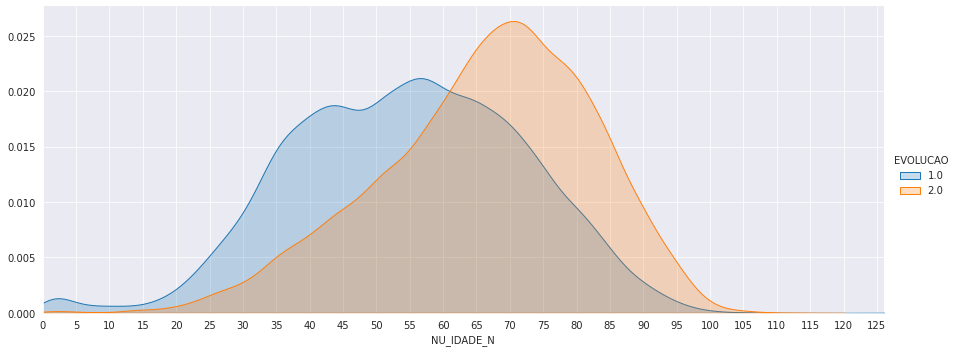

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(srag, hue='EVOLUCAO', height=5, aspect=2.5)
    g.map(sns.kdeplot, 'NU_IDADE_N', shade=True)
    g.add_legend()
    g.set(xticks=np.arange(0, srag['NU_IDADE_N'].max() + 1, 5), xlim=(0, srag['NU_IDADE_N'].max()))

Considerando o resultados das análises feitas anteriormente, avaliou-se interessante dividir os dados de **idade** entre **5 intervalos de faixa etária**. Para tanto, o algoritmo **K-means** foi utilizado para agrupar com maior exatidão os cluters baseados na idade dos pacientes.


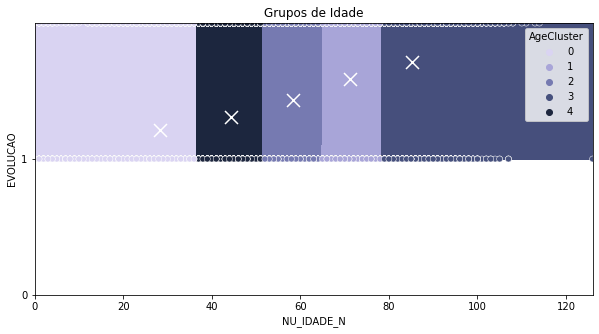

In [ ]:
# Usando o K-means para fazer a clusterização em 'NU_IDADE_N'
num_clusters = 5
X = srag[[ 'NU_IDADE_N', 'EVOLUCAO']].dropna()
kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
kmeans.fit(X)
X['AgeCluster'] = kmeans.labels_

# Plotando as divisões entre os clusters
plt.figure(figsize=(10,5))
h = 0.01
x_min, x_max = X['NU_IDADE_N'].min() - h, X['NU_IDADE_N'].max() + h
y_min, y_max = X['EVOLUCAO'].min() - h, X['EVOLUCAO'].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predizendo os grupos de idade para cada ponto 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Colocando o resultado da predição em um gráfico de cores
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap, aspect='auto')

# Plotando as idades
sns.scatterplot(x='NU_IDADE_N', y='EVOLUCAO', hue='AgeCluster', data=X, palette=cmap)

# Plotando os centróides (X brancos)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w')
plt.yticks([0, 1])
plt.title("Grupos de Idade")
plt.show()

Após a obtenção dos clusters, fez-se necessário convertê-los em faixas etárias.

In [ ]:
# Convertendo os clusters do K-means em faixa-etárias
age_bands = []
for k in range(num_clusters):
    age_bands.append(xx[Z==k].min())

# Ordenando os intervalos de faixa etária
age_bands.sort()

# Definindo o limite inferior do primeiro intervalo como 0 
age_bands[0] = 0.0

# Definindo o limite superior do último intervalo para infinito
age_bands.append(np.inf)

# Convertendo a lista para um numpy array
print("Age bands: {}".format(np.array(age_bands)))

Age bands: [ 0.   36.33 51.33 64.69 78.2    inf]


In [ ]:
# Definindo explicitamente o limite superior do intervalo para 120.0
age_bands = [0.0, 34.61, 50.09, 63.72, 77.4, 120.0]

Em seguida, os valores de idade da coluna N_IDADE_N foram substituídos por valores dos grupos de faixa etária formados, e transformados em valores categóricos.

In [ ]:
srag['NU_IDADE_N'] = pd.cut(srag['NU_IDADE_N'], age_bands)
srag.groupby('NU_IDADE_N')['EVOLUCAO'].mean()

NU_IDADE_N
(0.0, 34.61]      1.204870
(34.61, 50.09]    1.294574
(50.09, 63.72]    1.420218
(63.72, 77.4]     1.578308
(77.4, 120.0]     1.707853
Name: EVOLUCAO, dtype: float64

In [ ]:
srag['NU_IDADE_N'] = srag['NU_IDADE_N'].astype('category').cat.codes

In [ ]:
srag['NU_IDADE_N'].value_counts()

 3    15554
 2    13236
 1    11593
 4     9461
 0     4476
-1        5
Name: NU_IDADE_N, dtype: int64

**Balanceamento das classes**

O desbalanceamento de classes ocorre quando um dataset possui muitos exemplos de uma determinada classe e poucos exemplos de outra(s) classe(s). Nesses casos, o resultado do modelo de Machine Learning será enviesado, ou seja, ele tenderá a classificar os novos dados como sendo da classe que possui mais exemplos.

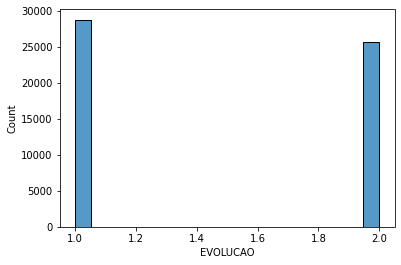

In [ ]:
Counter(srag["EVOLUCAO"])

sns.histplot(data = srag["EVOLUCAO"], stat="count", legend = True)

A partir da exploração dos dados da coluna EVOLUCAO, avaliou-se que a quantidade de dados referentes aos óbitos e as curas estava desbalanceada. Para lidar com esse problema, optou-se por utilizar a técnica Undersampling.
A técnica Undersampling consiste em reduzir de forma aleatória os exemplos da classe majoritária. Dessa forma, a quantidade de exemplos será igual para ambas as classes.

In [ ]:
#Definindo variáveis para cada uma das classes
obito = srag[srag.EVOLUCAO == 1]
cura = srag[srag.EVOLUCAO == 2]

In [ ]:
#Verificando o desbalanceamento
len(obito), len(cura)

(28737, 25588)

In [ ]:
#Fazendo o balanceamento entre as classes

obito = resample(obito, 
                      replace=False,    
                      n_samples=25588,   # Para se igualar a classe minoritária 
                      random_state=25)   # reproducible results

srag = pd.concat([obito, cura])


**Normalizando as features com Feature Scalling**


Na maioria das vezes, os conjuntos de dados irão conter taxas de valores de dados brutos que variam amplamente. Nesse contexto, em alguns algoritmos de Machine Learning, as funções não funcionarão corretamente sem normalização.

Esse recurso é necessário porque, se um dos atributos possui uma ampla faixa de variação de valores, a predição será controlada por esse atributo específico. Portanto, o intervalo de todos os atributos deve ser normalizado para que cada um contribua de forma proporcional para a predição final.

In [ ]:
# Fazendo a normalização dos dados
scaler = StandardScaler()
scaler.fit(srag)
X_scaled_array = scaler.transform(srag)
std_srag = pd.DataFrame(X_scaled_array, columns = srag.columns)
std_srag.head()

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,CARDIOPATI,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,RENAL,IMUNODEPRE,SUPORT_VEN,OBESIDADE,NU_IDADE_N,HOSPITAL,UTI,EVOLUCAO
0,1.228212,-0.669528,0.394767,-0.592546,1.117719,1.295365,0.346936,0.244242,0.205933,0.400928,0.294411,0.286260,-1.408060,0.140668,-1.712772,0.172872,0.142035,0.18463,0.131045,1.263680,-3.270275,0.597035,-0.238576,-1.260800,-1.0
1,-0.814192,-0.669528,0.394767,-0.592546,1.117719,-0.771983,0.346936,0.244242,0.205933,0.400928,0.294411,0.286260,0.710197,0.140668,0.583849,0.172872,0.142035,0.18463,0.131045,-0.077828,0.305785,-1.061698,-0.238576,-1.260800,-1.0
2,1.228212,1.493589,0.394767,-0.592546,-0.894679,-0.771983,0.346936,0.244242,0.205933,-2.494215,-3.396615,-3.493323,0.710197,0.140668,0.583849,0.172872,0.142035,0.18463,0.131045,1.263680,0.305785,-0.232332,-0.238576,0.793147,-1.0
3,-0.814192,-0.669528,0.394767,-0.592546,-0.894679,-0.771983,0.346936,0.244242,0.205933,0.400928,0.294411,0.286260,0.710197,0.140668,0.583849,0.172872,0.142035,0.18463,0.131045,-0.077828,0.305785,0.597035,-0.238576,-1.260800,-1.0
4,-0.814192,-0.669528,0.394767,1.687634,1.117719,1.295365,-2.882380,-4.094298,0.205933,0.400928,0.294411,0.286260,0.710197,0.140668,0.583849,-5.784631,0.142035,0.18463,-7.630955,1.263680,0.305785,-1.891065,-0.238576,0.793147,-1.0


**Separando o dataset em features (X) e classes (y)**

In [ ]:
X= srag.drop(columns=['EVOLUCAO'])
y = srag['EVOLUCAO']

**Separando o dataset em conjunto de treinamento e conjunto de teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=42)

**Treinando os modelos de Machine Learning**



Para realizar as predições das evoluções dos casos dos pacientes e identificar o impacto dos sintomas e/ou comorbidades, foram realizadas predições com os seguintes algoritmos supervisionados de classificação: Logist Regression, Decision Tree, Naive Bayes e Random Forest. Os resultados obtidos através dos modelos encontram-se abaixo:

**Logistic Regression**

In [ ]:
LR_classifier = LogisticRegression(random_state=random_state, max_iter=150)
LR_classifier.fit(X_train, y_train)
LR_pred = LR_classifier.predict(X_test)

print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

         1.0       0.74      0.75      0.75      5118
         2.0       0.75      0.74      0.74      5118

    accuracy                           0.74     10236
   macro avg       0.74      0.74      0.74     10236
weighted avg       0.74      0.74      0.74     10236



**Avaliação da importância de cada atributo para predição do modelo**

In [ ]:
feature_importance = pd.DataFrame({'feature':list(X.columns),'feature_importance':[abs(i) for i in LR_classifier.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
22,HOSPITAL,2.000725
23,UTI,1.359692
19,SUPORT_VEN,0.838876
17,RENAL,0.819486
21,NU_IDADE_N,0.603982
18,IMUNODEPRE,0.574538
15,NEUROLOGIC,0.432277
20,OBESIDADE,0.314163
6,DIARREIA,0.295627
11,PERD_PALA,0.288970


**Decision Tree Classifier**

In [ ]:
DT_classifier = DecisionTreeClassifier(random_state=random_state)
DT_classifier.fit(X_train, y_train)
DT_pred = DT_classifier.predict(X_test)

print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

         1.0       0.72      0.76      0.74      5118
         2.0       0.75      0.70      0.72      5118

    accuracy                           0.73     10236
   macro avg       0.73      0.73      0.73     10236
weighted avg       0.73      0.73      0.73     10236



**Avaliação da importância de cada atributo para predição do modelo**

In [ ]:
feature_importance = pd.DataFrame({'feature':list(X.columns),'feature_importance':DT_classifier.feature_importances_})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
19,SUPORT_VEN,0.374584
21,NU_IDADE_N,0.142845
23,UTI,0.040361
12,CARDIOPATI,0.035139
22,HOSPITAL,0.032423
0,FEBRE,0.031482
5,SATURACAO,0.029423
14,DIABETES,0.026907
4,DESC_RESP,0.026749
9,FADIGA,0.026333


**Naive Bayes Classifier**

In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
NB_pred = NB_classifier.predict(X_test)

print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.81      0.74      5118
         2.0       0.76      0.61      0.68      5118

    accuracy                           0.71     10236
   macro avg       0.72      0.71      0.71     10236
weighted avg       0.72      0.71      0.71     10236



**Avaliação da importância de cada atributo para predição do modelo**

In [ ]:
imps = permutation_importance(NB_classifier, X_test, y_test)
importances = imps.importances_mean

feature_importance = pd.DataFrame({'feature':list(X.columns),'feature_importance':list(importances)})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
19,SUPORT_VEN,0.054846
23,UTI,0.036088
22,HOSPITAL,0.017800
21,NU_IDADE_N,0.014771
15,NEUROLOGIC,0.008206
17,RENAL,0.006936
11,PERD_PALA,0.006448
10,PERD_OLFT,0.005061
16,PNEUMOPATI,0.003908
18,IMUNODEPRE,0.003165


**Random Forest**

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 250, criterion = 'entropy', random_state = random_state)
RF_classifier.fit(X_train, y_train)
RF_pred = RF_classifier.predict(X_test)

print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

         1.0       0.75      0.77      0.76      5118
         2.0       0.76      0.75      0.75      5118

    accuracy                           0.76     10236
   macro avg       0.76      0.76      0.76     10236
weighted avg       0.76      0.76      0.76     10236



**Avaliação da importância de cada atributo para predição do modelo**

In [ ]:
feature_importance = pd.DataFrame({'feature':list(X.columns),'feature_importance':RF_classifier.feature_importances_})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
19,SUPORT_VEN,0.256813
21,NU_IDADE_N,0.156696
23,UTI,0.096588
0,FEBRE,0.038340
5,SATURACAO,0.033866
12,CARDIOPATI,0.033214
3,DISPNEIA,0.032464
1,TOSSE,0.031908
4,DESC_RESP,0.031400
9,FADIGA,0.031256


**Resultados**

**Matriz de Confusão e Acurácia dos modelos**

A partir da avaliação das **matrizes de confusão** e **acurácia** dos modelos, obtivemos as seguintes acurácias:

<br>

**1 - Random Forest:** 75.25%

**2 - Logistic Regression:** 74.94%

**3 - Decision Tree:** 72.55%

**4 - Naive Bayes:** 72.14%

In [ ]:
models = [LR_classifier, DT_classifier, NB_classifier, RF_classifier]
models_name =['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']
acc = []
cross = []

for i in models:
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred)*100)
  scores = cross_val_score(i, X_train, y_train, cv=5, scoring='accuracy')
  cross.append(scores)

  print(confusion_matrix(y_test,y_pred))
  print("Acurácia (Cross-Validation): %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), '\n')

[[3855 1263]
 [1353 3765]]
Acurácia (Cross-Validation): 0.7494 (+/- 0.01) 

[[3902 1216]
 [1535 3583]]
Acurácia (Cross-Validation): 0.7255 (+/- 0.01) 

[[4150  968]
 [2000 3118]]
Acurácia (Cross-Validation): 0.7214 (+/- 0.01) 

[[3940 1178]
 [1300 3818]]
Acurácia (Cross-Validation): 0.7525 (+/- 0.01) 



**Gráfico das acurácias dos modelos**

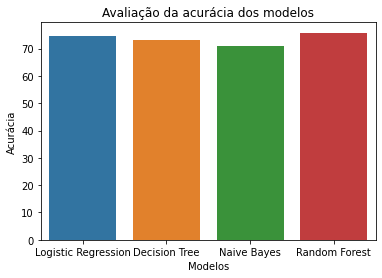

In [ ]:
b = sns.barplot(x=models_name, y=acc)
b.set_title('Avaliação da acurácia dos modelos')
b.set_ylabel('Acurácia')
b.set_xlabel('Modelos');

**Discussão**

Sobre a análise de importância dos atributos, os atributos referente ao uso de suporte ventilatório, internação (leito comum e UTI) e idade destacaram-se como fatores de maior impacto para predição de óbitos e curas de pacientes acometidos por Covid-19. Para 75% dos algoritmos (Logistic Regression, Decision Tree, Naive Bayes e Random Forest) utilizados, o atributo referente ao suporte ventilatório foi o mais determinante para predição da evolução dos casos.

Em seguida, para 50% dos modelos (Logistic Regression e Naive Bayes), o atributo referente à internação na UTI destacou-se como segundo principal atributo para predição. Semelhantemente, o atributo referente à faixa etária foi o segundo mais importante para predição dos modelos Random Forest e Decision Tree. Considerando a importância dos sintomas e comorbidades para a predição da evolução dos casos de Covid-19, os resultados obtidos nos modelos são considerados inconclusivos. 


## **6 Conclusão**

O presente estudo apresentou resultados sobre a evolução da SRAG e monitoramento da campanha de vacinação contra COVID-19 nos estados do nordeste brasileiro. Os resultados de taxa de mortalidade apresentados mostram que populações maiores não necessariamente são mais suscetíveis à altas taxas de mortalidade. Além disso, através dos resultados de taxa de letalidade, percebe-se que, alguns estados com baixas taxas de mortalidade possuem altas taxas de letalidade. Ambos resultados podem ser atribuídos a diversos fatores como condução de políticas públicas adotadas para o combate ao novo coronavírus, monitoramento dos dados epidemiológicos, estrutura etária da população, assim como desigualdades culturais, sociais e econômicas do estado.

A partir dos resultados apresentados sobre os perfis epidemiológicos dos indivíduos é possível compreender alguns fatores impactantes para óbitos em decorrência da COVID-19. A presença de comorbidades e a faixa etária elevada de alguns pacientes mostraram-se como agravantes para a ocorrência de óbitos por COVID-19. Como agravante, as estatísticas apresentadas sobre o tempo de internação hospitalar (leitos comuns e UTI) por COVID-19 no Brasil evidenciam uma situação crítica do sistema de saúde para atender à demanda potencial gerada pela pandemia. Este resultado torna-se preocupante ao avaliarmos estados com preparo precário à ofertas de serviços, uma vez que a superlotação de hospitais compromete o atendimento, principalmente a pacientes com sintomas mais graves, resultando no aumento da mortalidade.

Segundo os resultados sobre os dados da campanha de vacinação, aproximadamente 25.37% da população nordestina vacinada está com a segunda dose da vacina contra a Covid-19 atrasada. Esse dado alerta para o comprometimento da imunização por ameaçar a eficiência da vacina fora do prazo estipulado pelo fabricante, considerando que ela é baseada em ensaios clínicos que possuem esse período entre doses muito bem definido. Além disso, outro dado preocupante é a ocorrência de indivíduos que tomaram doses de vacinas de fabricantes diferentes. Assim como o atraso da segunda dose, doses de fabricantes diferentes podem comprometer a eficácia do imunizante, além de aumentar os riscos de reações.

As principais limitações dos estudos são as inconsistências verificadas nos datasets, provavelmente ocasionadas pela não imposição de restrições no banco de dados. Foram encontrados dados duplicados, ausentes e preenchidos de maneira errada. Os dados precisaram ser adaptados verificando cada caso em particular para minimizar imprecisões na análise.  Além disso,  percebeu-se que há um atraso na coleta dos dados, ou seja, o dataset não dispõe de todos os dados referentes às semanas que antecedem sua data de publicação, o que impossibilita realizar uma análise segura nas semanas próximas à sua disponibilização. Em síntese, os dados analisados não são muito confiáveis, o que pode ocasionar em estatísticas e interpretações com propagação de erro, sendo esta a principal limitação do estudo. 

Como trabalhos futuros, pretende explorar as inconsistências encontradas para reportar seus principais problemas ao órgão público responsável por sua manutenção e monitoramento. Além disso, melhorar o classificador desenvolvido através do refinamento dos modelos e dos dados selecionados. Espera-se através do classificador auxiliar a tomada de decisão em relação ao monitoramento de pacientes em situação de vulnerabilidade. 

Por fim, em relação às melhorias que podem ser feitas, destacamos a melhoria do classificador através dos aspectos anteriormente descritos, melhoria dos gráficos apresentados através dos princípios ensinados na disciplina, e detalhamento e refinamento da apresentação dos resultados.
